In [64]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import api key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [65]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [66]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [67]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [68]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [69]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | pedra
Processing Record 5 of Set 1 | la macarena
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | caravelas
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | bam
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | hetauda
Processing Record 18 of Set 1 | ixtapa
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | talcahuano
Processing Record 21 of Set 1 | jiangyou
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1 | yumen
Processing Record 24 

Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | tombouctou
Processing Record 41 of Set 4 | baiyin
Processing Record 42 of Set 4 | salinas
Processing Record 43 of Set 4 | butterworth
Processing Record 44 of Set 4 | visp
Processing Record 45 of Set 4 | omsukchan
Processing Record 46 of Set 4 | san carlos de bariloche
Processing Record 47 of Set 4 | atasu
Processing Record 48 of Set 4 | gorontalo
Processing Record 49 of Set 4 | zonguldak
Processing Record 50 of Set 4 | vestmannaeyjar
Processing Record 1 of Set 5 | kidodi
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | chokwe
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | qui nhon
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | ulladulla
Processing Record 9 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 10 of Set 5 | guiong
Processing Record 11 of Set 5 | pema

Processing Record 30 of Set 8 | cacapava do sul
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | miguel calmon
Processing Record 33 of Set 8 | batemans bay
Processing Record 34 of Set 8 | bathsheba
Processing Record 35 of Set 8 | sioux lookout
Processing Record 36 of Set 8 | nishihara
Processing Record 37 of Set 8 | griffith
Processing Record 38 of Set 8 | babanusah
City not found. Skipping...
Processing Record 39 of Set 8 | klyuchi
Processing Record 40 of Set 8 | olinda
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | kazachinskoye
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | kushmurun
Processing Record 45 of Set 8 | teruel
Processing Record 46 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 8 | kieta
Processing Record 48 of Set 8 | polysayevo
Processing Record 49 of Set 8 | kuala terengganu
Processing Record 50 of Set 8 | araouane
Processing Record 1 of Set 9 | ira

Processing Record 18 of Set 12 | kushima
Processing Record 19 of Set 12 | mount gambier
Processing Record 20 of Set 12 | deputatskiy
Processing Record 21 of Set 12 | ambilobe
Processing Record 22 of Set 12 | tripoli
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | maragogi
Processing Record 25 of Set 12 | namatanai
Processing Record 26 of Set 12 | zheleznogorsk
Processing Record 27 of Set 12 | soyo
Processing Record 28 of Set 12 | oltu
Processing Record 29 of Set 12 | gwanda
Processing Record 30 of Set 12 | cottonwood
Processing Record 31 of Set 12 | karpathos
Processing Record 32 of Set 12 | palanga
Processing Record 33 of Set 12 | waipawa
Processing Record 34 of Set 12 | adjud
Processing Record 35 of Set 12 | nipawin
Processing Record 36 of Set 12 | muisne
Processing Record 37 of Set 12 | aklavik
Processing Record 38 of Set 12 | genhe
Processing Record 39 of Set 12 | tutoia
Processing Record 40 of Set 12 | hithadhoo
Processing Record 41 of Set 12 | poronaysk
P

In [70]:
len(cities)

614

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,66.99,93,0,13.94,ZA,2020-02-20 20:53:22
1,Cape Town,-33.93,18.42,68.00,72,0,21.92,ZA,2020-02-20 20:51:03
2,Busselton,-33.65,115.33,68.00,34,70,15.84,AU,2020-02-20 20:53:27
3,Pedra,-8.50,-36.94,76.42,70,100,9.04,BR,2020-02-20 20:57:27
4,La Macarena,2.18,-73.78,93.00,41,92,6.22,CO,2020-02-20 20:57:27
5,Ribeira Grande,38.52,-28.70,57.20,62,40,6.93,PT,2020-02-20 20:54:51
6,Kapaa,22.08,-159.32,77.00,73,90,20.80,US,2020-02-20 20:52:31
7,Brae,60.40,-1.35,41.00,75,61,24.16,GB,2020-02-20 20:54:08
8,Tasiilaq,65.61,-37.64,21.20,79,75,9.17,GL,2020-02-20 20:53:22
9,Sitka,57.05,-135.33,37.40,86,90,25.28,US,2020-02-20 20:53:22


In [72]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-02-20 20:53:22,-34.42,19.23,66.99,93,0,13.94
1,Cape Town,ZA,2020-02-20 20:51:03,-33.93,18.42,68.00,72,0,21.92
2,Busselton,AU,2020-02-20 20:53:27,-33.65,115.33,68.00,34,70,15.84
3,Pedra,BR,2020-02-20 20:57:27,-8.50,-36.94,76.42,70,100,9.04
4,La Macarena,CO,2020-02-20 20:57:27,2.18,-73.78,93.00,41,92,6.22


In [73]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [74]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

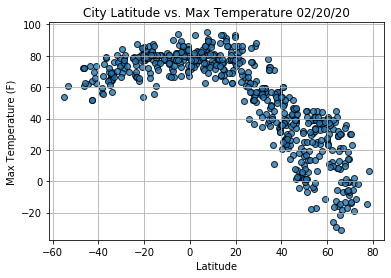

In [75]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

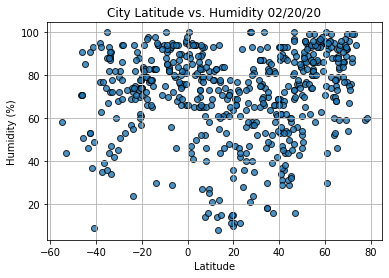

In [76]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

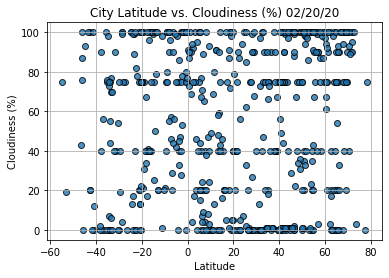

In [77]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

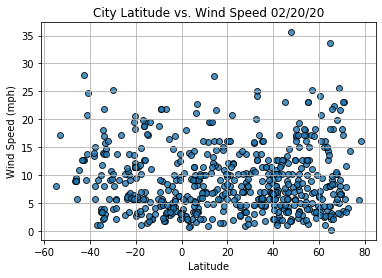

In [78]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [79]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [80]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2020-02-20 20:53:22
Lat                          3.07
Lng                        172.79
Max Temp                    83.17
Humidity                       80
Cloudiness                    100
Wind Speed                  13.94
Name: 13, dtype: object

In [81]:
city_data_df["Lat"] >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,La Macarena,CO,2020-02-20 20:57:27,2.18,-73.78,93.00,41,92,6.22
5,Ribeira Grande,PT,2020-02-20 20:54:51,38.52,-28.70,57.20,62,40,6.93
6,Kapaa,US,2020-02-20 20:52:31,22.08,-159.32,77.00,73,90,20.80
7,Brae,GB,2020-02-20 20:54:08,60.40,-1.35,41.00,75,61,24.16
8,Tasiilaq,GL,2020-02-20 20:53:22,65.61,-37.64,21.20,79,75,9.17
...,...,...,...,...,...,...,...,...,...
561,Nioro,GM,2020-02-20 20:54:08,13.35,-15.75,88.03,8,58,6.89
562,Bardiyah,LY,2020-02-20 20:54:53,31.76,25.09,59.25,75,97,15.95
563,Bozoum,CF,2020-02-20 20:58:17,6.32,16.38,75.36,27,71,3.00
564,Toledo,ES,2020-02-20 20:58:17,39.83,-4.00,54.00,66,0,6.55


In [82]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

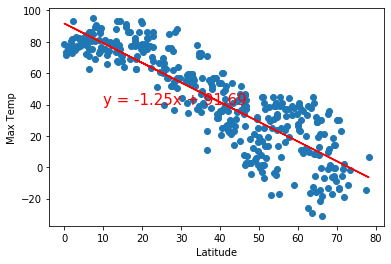

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

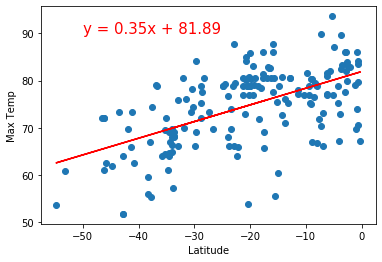

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere /n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

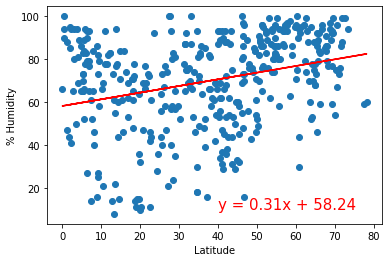

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

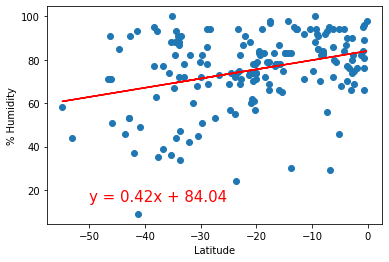

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))


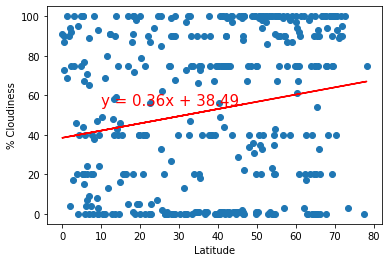

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n'
                    'for % Cloudiness', '% Cloudiness',(10,55))

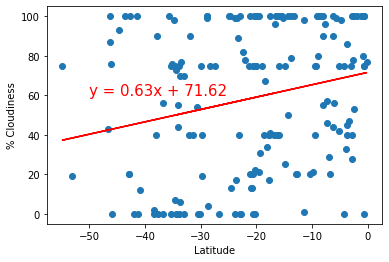

In [96]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

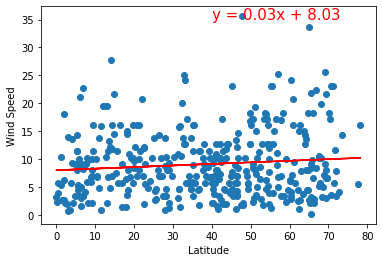

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(40,35))

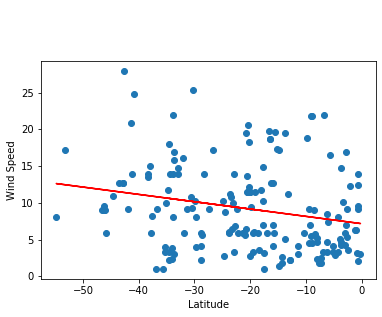

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,35))